In [1]:
import pandas as pd

# Load 2D and 3D datasets
df_2d = pd.read_csv('/Users/niveditasaha/Downloads/2d and 3d/2d data/2d_contraction_speed.csv')
df_3d = pd.read_csv('/Users/niveditasaha/Downloads/2d and 3d/3d data/3dd_contraction_speed.csv')

# Basic statistics
print("2D Data Statistics")
print(df_2d.describe())

print("3D Data Statistics")
print(df_3d.describe())


2D Data Statistics
       Max Contraction  Min Contraction  Avg Contraction  Median Contraction  \
count        13.000000        13.000000        13.000000           13.000000   
mean        615.306423        76.679038       283.733086          254.795050   
std         447.696835        63.351056       250.805275          250.479656   
min          61.801700        22.553500        41.162649           38.583300   
25%         311.573900        37.456600        98.050214           82.307300   
50%         587.061500        62.524100       202.923781          155.507100   
75%         895.507100        83.887000       419.427341          387.862450   
max        1336.186600       259.566100       808.613025          823.959500   

       Variance Contraction  Max Speed of Contraction  \
count             13.000000                 13.000000   
mean           36571.324590                403.045792   
std            45902.689268                315.705986   
min               56.540796     

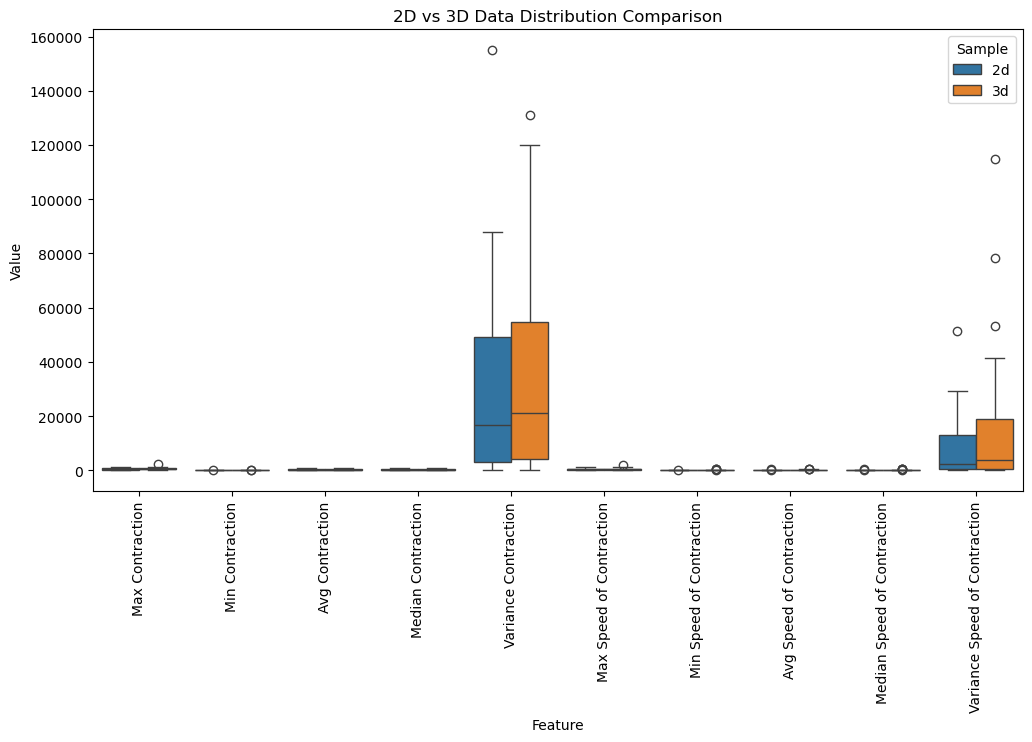

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt data for easy plotting
df_2d_melt = df_2d.melt(id_vars="Sample", var_name="Feature", value_name="Value")
df_3d_melt = df_3d.melt(id_vars="Sample", var_name="Feature", value_name="Value")

# Plot boxplot for 2D and 3D comparisons
plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Value', hue='Sample', data=pd.concat([df_2d_melt, df_3d_melt]))
plt.xticks(rotation=90)
plt.title('2D vs 3D Data Distribution Comparison')
plt.show()


# Statistical Analysis

In [3]:
from scipy import stats
import numpy as np

# Extract the 'Variance Contraction' and 'Variance Speed of Contraction' columns
variance_contraction_2d = df_2d['Variance Contraction'].values
variance_contraction_3d = df_3d['Variance Contraction'].values
variance_speed_2d = df_2d['Variance Speed of Contraction'].values
variance_speed_3d = df_3d['Variance Speed of Contraction'].values

# Perform T-test for Variance Contraction
t_stat_variance_contraction, p_val_variance_contraction = stats.ttest_ind(variance_contraction_2d, variance_contraction_3d)

# Perform T-test for Variance Speed of Contraction
t_stat_variance_speed, p_val_variance_speed = stats.ttest_ind(variance_speed_2d, variance_speed_3d)

# Perform Mann-Whitney U test for Variance Contraction
u_stat_variance_contraction, p_u_val_variance_contraction = stats.mannwhitneyu(variance_contraction_2d, variance_contraction_3d)

# Perform Mann-Whitney U test for Variance Speed of Contraction
u_stat_variance_speed, p_u_val_variance_speed = stats.mannwhitneyu(variance_speed_2d, variance_speed_3d)

# Display the results
print(f"T-test Variance Contraction: t-stat = {t_stat_variance_contraction}, p-val = {p_val_variance_contraction}")
print(f"T-test Variance Speed: t-stat = {t_stat_variance_speed}, p-val = {p_val_variance_speed}")
print(f"Mann-Whitney U Test Variance Contraction: u-stat = {u_stat_variance_contraction}, p-val = {p_u_val_variance_contraction}")
print(f"Mann-Whitney U Test Variance Speed: u-stat = {u_stat_variance_speed}, p-val = {p_u_val_variance_speed}")


T-test Variance Contraction: t-stat = 0.056080073042488465, p-val = 0.9556062868885206
T-test Variance Speed: t-stat = -0.8461356889505697, p-val = 0.403393096397777
Mann-Whitney U Test Variance Contraction: u-stat = 142.0, p-val = 0.8176582164202393
Mann-Whitney U Test Variance Speed: u-stat = 128.0, p-val = 0.4891421190435159


# Machine learning model

# Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.83      0.62      0.71         8

    accuracy                           0.64        11
   macro avg       0.62      0.65      0.61        11
weighted avg       0.72      0.64      0.66        11

Model Accuracy: 0.64


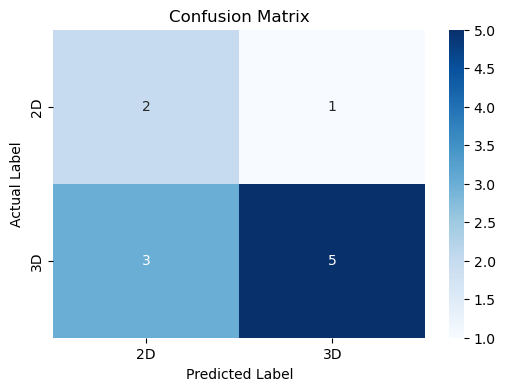

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column to indicate the sample type (2D or 3D)
df_2d['Sample_Type'] = '2D'
df_3d['Sample_Type'] = '3D'

# Combine the datasets
df_combined = pd.concat([df_2d, df_3d], ignore_index=True)

# Select only numeric columns for feature matrix X
X = df_combined.select_dtypes(include=['float64', 'int64'])  
y = df_combined['Sample_Type'].map({'2D': 0, '3D': 1})  

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["2D", "3D"], yticklabels=["2D", "3D"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()


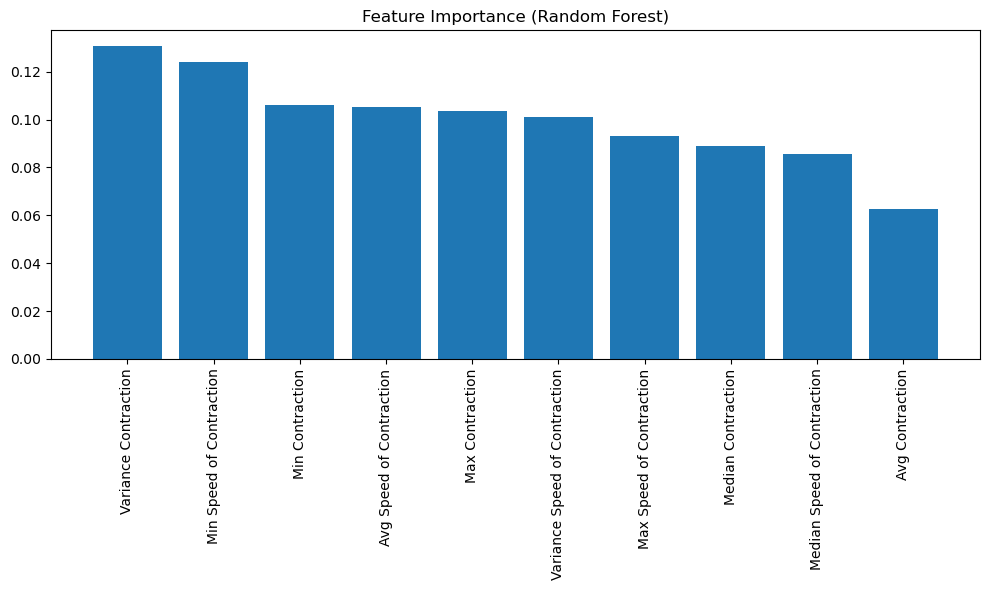

In [5]:

# Get feature importance from the trained Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


# SVM

In [8]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Add a column to indicate the sample type (2D or 3D)
df_2d['Sample_Type'] = '2D'
df_3d['Sample_Type'] = '3D'

# Combine the datasets
df_combined = pd.concat([df_2d, df_3d], ignore_index=True)

# Select only numeric columns for feature matrix X
X = df_combined.select_dtypes(include=['float64', 'int64'])  # Only numeric features
y = df_combined['Sample_Type'].map({'2D': 0, '3D': 1})  # Target (0 for 2D, 1 for 3D)

# Split the dataset into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.75      0.43      0.55         7

    accuracy                           0.55        11
   macro avg       0.59      0.59      0.55        11
weighted avg       0.63      0.55      0.55        11

Model Accuracy: 0.55


# KNN

In [9]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# Add a column to indicate the sample type (2D or 3D)
df_2d['Sample_Type'] = '2D'
df_3d['Sample_Type'] = '3D'

# Combine the datasets
df_combined = pd.concat([df_2d, df_3d], ignore_index=True)

# Select only numeric columns for feature matrix X
X = df_combined.select_dtypes(include=['float64', 'int64'])  
y = df_combined['Sample_Type'].map({'2D': 0, '3D': 1})  

# Split the dataset into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model with a specified number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.67      0.86      0.75         7

    accuracy                           0.64        11
   macro avg       0.58      0.55      0.54        11
weighted avg       0.61      0.64      0.60        11

Model Accuracy: 0.64


# The End